__*Name: Gaurav Kumar*__

__*Roll Number: 19HCS4017*__

__*Course: BSc(Hons) Computer Science*__

__*Semester: 6th*__

__*Paper: Data Mining*__

Q2. Perform the following preprocessing tasks on the dirty_iris dataset.

i)	Calculate the number and percentage of observations that are complete.

ii)	Replace all the special values in data with NA.

iii)	Define these rules in a separate text file and read them.

Print the resulting constraint object.

– Species should be one of the following values: setosa, versicolor or virginica.

–	All measured numerical properties of an iris should be positive.

–	The petal length of an iris is at least 2 times its petal width.

–	The sepal length of an iris cannot exceed 30 cm.

–	The sepals of an iris are longer than its petals.

iv)	Determine how often each rule is broken (violatedEdits). Also summarize and plot the
result.

v)	Find outliers in sepal length using boxplot and boxplot.stats

In [36]:
import pandas as pd
import numpy as np
import seaborn as sb
from pylab import rcParams
df = pd.read_csv("iris_dirty.csv")
df.head()

,Unnamed: 0,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,@,3,1.4,0.2,Setosa
2,3,4.7,3.2,1.3,0.2,Setosa
3,4,4.6,3.1,1.5,0.2,Setosa
4,5,NaN,3.6,1.4,0.2,Setosa


In [37]:
df.drop("Unnamed: 0",inplace=True, axis=1)
print(df)

    Sepal_Length Sepal_Width Petal_Length Petal_Width    Species
0            5.1         3.5          1.4         0.2     Setosa
1              @           3          1.4         0.2     Setosa
2            4.7         3.2          1.3         0.2     Setosa
3            4.6         3.1          1.5         0.2     Setosa
4            NaN         3.6          1.4         0.2     Setosa
..           ...         ...          ...         ...        ...
145          6.7           3          5.2         2.3  Virginica
146          6.3         2.5            5         1.9  Virginica
147          6.5           3          5.2           2  Virginica
148          6.2         3.4          5.4         2.3  Virginica
149          NaN           3          5.1         1.8  Virginica

[150 rows x 5 columns]


In [38]:
nanList = [df.loc[i].isnull().sum() for i in range(0, df.shape[0])]

In [39]:
completeObser = nanList.count(0)
print("The percentage of complete Observations in the dirty iris dataset is: {percent: .2f}%".format(percent=((completeObser/len(nanList))*100)))

The percentage of complete Observations in the dirty iris dataset is:  87.33%


In [40]:
df.replace(["@","_"], np.nan, inplace=True)
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,NaN,3,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,NaN,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3,5.2,2.3,Virginica
146,6.3,2.5,5,1.9,Virginica
147,6.5,3,5.2,2,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [41]:
def ruleSet(df):
    newDf = df.copy(deep=True)
    newDf["Rule1"] = df["Species"].apply(lambda x: True if x == "virginica" or x == "setosa" or x == "versicolor" else False)
    newDf["Rule2"] = df.apply(lambda x: True if float(x.Sepal_Length) > 0.0 and float(x.Sepal_Width) > 0.0 and float(x.Petal_Length) > 0.0 and float(x.Petal_Width) > 0.0 else False, axis=1)
    newDf["Rule3"] = df.apply(lambda x: True if float(x.Petal_Length) >= 2*float(x.Petal_Width) else False, axis=1)
    newDf["Rule4"] = df["Sepal_Length"].apply(lambda x: True if float(x) > 30 else False)
    newDf["Rule5"] = df.apply(lambda x: True if float(x.Sepal_Length) > float(x.Petal_Length) else False, axis=1)
    return newDf

In [42]:
afterRuleData = ruleSet(df)
afterRuleData.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,Rule1,Rule2,Rule3,Rule4,Rule5
0,5.1,3.5,1.4,0.2,Setosa,False,True,True,False,True
1,NaN,3,1.4,0.2,Setosa,False,False,True,False,False
2,4.7,3.2,1.3,0.2,Setosa,False,True,True,False,True
3,4.6,3.1,1.5,0.2,Setosa,False,True,True,False,True
4,NaN,3.6,1.4,0.2,Setosa,False,False,True,False,False


In [43]:
afterRuleData[["Rule1","Rule2","Rule3","Rule4"]] = afterRuleData[["Rule1","Rule2","Rule3","Rule4"]].astype(int)

In [44]:
afterRuleData[["Rule1","Rule2","Rule3","Rule4"]].describe()

,Rule1,Rule2,Rule3,Rule4
count,150.0,150.000000,150.000000,150.0
mean,0.0,0.826667,0.973333,0.0
std,0.0,0.379803,0.161647,0.0
min,0.0,0.000000,0.000000,0.0
25%,0.0,1.000000,1.000000,0.0
50%,0.0,1.000000,1.000000,0.0
75%,0.0,1.000000,1.000000,0.0
max,0.0,1.000000,1.000000,0.0


<AxesSubplot:>

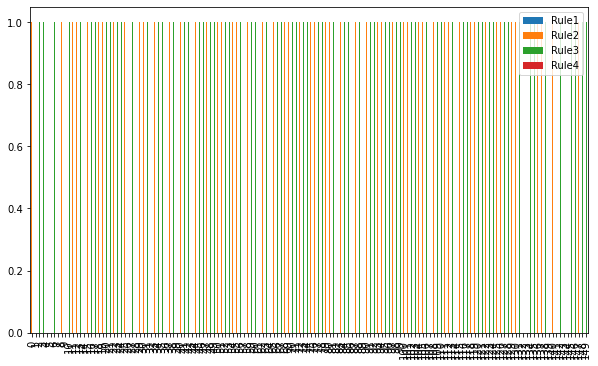

In [45]:
afterRuleData.plot(y=["Rule1","Rule2","Rule3","Rule4"],kind ="bar")

<AxesSubplot:xlabel='Species', ylabel='Sepal_Length'>

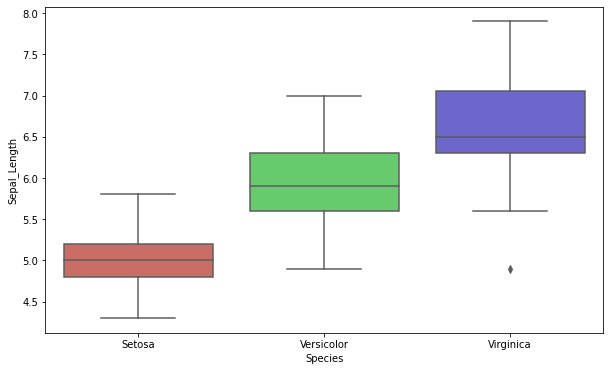

In [46]:

rcParams["figure.figsize"] =10,6
df["Sepal_Length"] = df["Sepal_Length"].astype(float)
sb.boxplot(x="Species",y ="Sepal_Length",data=df,palette="hls")